In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [2]:
train_dataset=datasets.FashionMNIST(root='dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='dataset',train=False,transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.5MB/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 339kB/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.29MB/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.54MB/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

**data in batches**

In [5]:
batch_size=64
device='cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [7]:
len(list(train_loader))

938

In [8]:
len(list(test_loader))

157

**Neural Network Model**

In [9]:
class NeuralNetwork(nn.Module):
  def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Linear(in_dim,n_hidden_1),
        nn.ReLU(True)
    )
    self.layer2=nn.Sequential(
        nn.Linear(n_hidden_1,n_hidden_2),
        nn.ReLU(True)
    )
    self.layer3=nn.Sequential(
        nn.Linear(n_hidden_2,out_dim),
        nn.ReLU(True)
    )
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    return x

In [10]:
in_dim=28*28
n_hidden_1=300
n_hidden_2=100
out_dim=10

In [11]:
model=NeuralNetwork(in_dim,n_hidden_1,n_hidden_2,out_dim)

In [12]:
model

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [13]:
model=model.to(device)

**opt and loss**

In [14]:
learning_rate=1e-3

In [15]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

**Training Loop**

In [16]:
num_epochs=20

In [17]:
for epoch in range(num_epochs):
  print('*' * 10)
  print(f'epoch{epoch+1}')
  running_loss=0.0
  running_acc=0.0
  for i,data in enumerate(train_loader,1):
    img,label=data
    img=img.view(img.size(0),-1)
    img=img.to(device)
    label=label.to(device)
    out=model(img)
    loss=criterion(out,label)
    running_loss +=loss.item()
    _,pred=torch.max(out,1)
    running_acc +=(pred == label).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i %300 == 0:
      print(f'epoch : {epoch+1} / {num_epochs},loss: {running_loss/i:.6f},acc:{running_acc/i:.6f}')
  print(f'Finish:{epoch+1} epoch,loss: {running_loss/i:.6f},acc:{running_acc/i:.6f}')


**********
epoch1
epoch : 1 / 20,loss: 1.153450,acc:0.643490
epoch : 1 / 20,loss: 1.067274,acc:0.678568
epoch : 1 / 20,loss: 1.026736,acc:0.693958
Finish:1 epoch,loss: 1.024407,acc:0.694863
**********
epoch2
epoch : 2 / 20,loss: 0.930433,acc:0.732188
epoch : 2 / 20,loss: 0.920786,acc:0.735443
epoch : 2 / 20,loss: 0.917929,acc:0.735017
Finish:2 epoch,loss: 0.916496,acc:0.735441
**********
epoch3
epoch : 3 / 20,loss: 0.902471,acc:0.739844
epoch : 3 / 20,loss: 0.893024,acc:0.743542
epoch : 3 / 20,loss: 0.888795,acc:0.745694
Finish:3 epoch,loss: 0.887089,acc:0.746202
**********
epoch4
epoch : 4 / 20,loss: 0.869038,acc:0.751875
epoch : 4 / 20,loss: 0.868942,acc:0.750677
epoch : 4 / 20,loss: 0.869589,acc:0.752535
Finish:4 epoch,loss: 0.868851,acc:0.752549
**********
epoch5
epoch : 5 / 20,loss: 0.860759,acc:0.753958
epoch : 5 / 20,loss: 0.857901,acc:0.755599
epoch : 5 / 20,loss: 0.858491,acc:0.755920
Finish:5 epoch,loss: 0.858975,acc:0.755680
**********
epoch6
epoch : 6 / 20,loss: 0.849827,ac

**Evaluate model**

In [18]:
model.eval()
eval_loss=0.0
eval_acc=0.0
for data in test_loader:
  img,label=data
  img=img.view(img.size(0),-1)
  img=img.to(device)
  label=label.to(device)
  with torch.no_grad():
    out=model(img)
    loss=criterion(out,label)
    eval_loss +=loss.item()
    _,pred=torch.max(out,1)
    eval_acc +=(pred==label).float().mean()

print(f'Test_loss: {eval_loss/len(test_loader)},acc: {eval_acc/len(test_loader)}')


Test_loss: 0.8928539500494671,acc: 0.758957028388977


**visulize model**

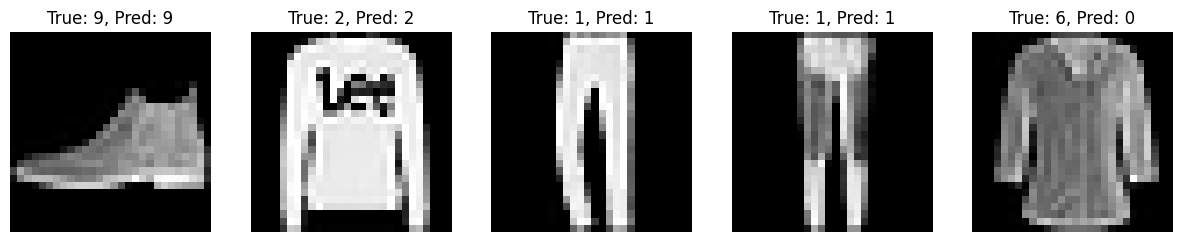

In [19]:
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

**Save Model**

In [20]:
model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[ 0.0629, -0.1888,  0.1368,  ...,  0.0180,  0.1898,  0.4176],
                      [-0.0156,  0.0902, -0.0695,  ..., -0.2370,  0.1446,  0.1553],
                      [-0.2916, -0.3166, -0.3387,  ...,  0.1302,  0.4272, -0.5006],
                      ...,
                      [-0.0274,  0.0150,  0.0037,  ...,  0.0647,  0.0977,  0.0111],
                      [ 0.0276,  0.0355,  0.0249,  ...,  0.0274,  0.0186, -0.0176],
                      [ 0.0537, -0.0357, -0.0547,  ...,  0.1296, -0.0967,  0.0919]])),
             ('layer1.0.bias',
              tensor([-1.9429e-01, -4.3942e-02, -5.6250e-01,  1.0035e-02, -1.3007e-01,
                       4.5977e-01,  1.0002e-01, -2.4893e-02,  2.7486e-01, -4.4795e-02,
                      -2.1885e-02, -2.5048e-01,  2.3884e-01, -4.2732e-01, -6.2463e-02,
                      -4.8699e-02,  1.2932e-01, -1.3855e-01,  3.8994e-01,  3.6975e-02,
                       3.0555e-01,  4.9998e-01, -2.205

In [21]:
torch.save(model.state_dict(),'./neuralnetwork.pth')